In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Import series** <a id="Import_series"></a> <br>

In [ ]:
import folium as fl
from folium import plugins
import ipywidgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction ::

* What is the definition of crime? 
* Why we commit the crime? 
* What is the crime of fundamental? 

We try to answer all these questions with little philosophy and little Kaggle dataset. I hope that we can answer all question in a notebook. However, this adventure will be 3 or 4 kernels. In this adventure, we analyze all crime data set which publishes in Kaggle and wrote (code) 5,8 notebook. I don't live in Boston or I never been Boston (Actually I have not got a  passport ). Because of that, I do not know anything about Boston. I try to do some consideration with the theory of the same human ( humans is the same everywhere ).

**What we have ??**
* [Import series](#Import_series)
* [Data sets](#Data_sets)
* [What is the crime](#What_is_the_crime)

CRIME TYPE AND CRIME COUNT ::
* [Crime type](#Crime_Type)

THE DISPERSION ACCORDİNG TO THE LOCATION
* [Unemployment rate/crime count](#Unemployment_rate/crime_count)


* [Solution part of first section](#Solution_part_of_first_section)
* [Highest crime type](#Highest_crime_type)
* [Devil of Boston](#Devil_of_Boston)

The dispersion according to the location::
* [Other / District](#Other/District)
* [Part One / District](#PartOne/District)
* [Part Two / District](#PartTwo/District)
* [Part Three / District](#PartThree/District)
* [Favorite street](#Favorite_street)

Solution tragedy ::

In a nutshell ::

**Data sets**<a id="Data_sets"></a> <br>

In [ ]:
unemp = pd.read_csv('../input/boston-unemployment-rate/Bostonrate.csv')
unemp

**What is the crime??**<a id="What_is_the_crime"></a> <br>

Crime is a violation event of law.  However, triggers that are in the background of that instant event cannot be neglected. We have numerous triggers such as phycological effect, pecuniary case, public case, environmental factors. That list did not include people who have some sociological and phycological problems. Every crime type has some particular trigger. We try to find all the triggers but it is not easy. Because of that, we will enjoy it.


In [ ]:
crime = pd.read_csv('../input/crimes-in-boston/crime.csv', encoding='latin-1')
crime.head(8)

### Crime Type and Crime count ::

**Crime type**  <a id="Crime_Type"></a> <br>

We can understand easily crime count. Downtown which saw easily did not want a guide. (That is Turkish idiom. I use direct translation because ı want culture mix.) That mean is more fun.

In [ ]:
r_crime_type = crime.groupby(["OFFENSE_CODE_GROUP"]).mean()
crime_type = list(r_crime_type.index)
print(r_crime_type.index)
print(len(r_crime_type.index))

### The dispersion according to the location: 

In [ ]:
sns.catplot(y="YEAR",data=crime,kind="count")

The crime count increased in 2016 and 2017 but in 2018, we have a perfect decline. We do not know why we have this decline. My first estimate is that the data set mistake. In the graph which is down of the text show crimes of the last 3 month. And we already know that graph uploaded on the fourth of September. That's means, we have not got the last 3-month crime data. Tear/Crime graph is affected by these missing data

In [ ]:
winter_data =crime.loc[(crime.MONTH) >9]

c_of_year = ["#0affe6","#8b658b","#ffc1c1" ]

sns.catplot(x="YEAR",data=winter_data,hue="MONTH",height=4,kind="count",palette=c_of_year)

-- I do know why I do that but in the next stage will be connected to this graph because of that I just want to show.--

In [ ]:
sns.catplot(y="YEAR",data=crime,hue="UCR_PART",height=4,kind="count")

**Unemployment rate/crime count**<a id="Unemployment_rate/crime_count"></a> <br>

In [ ]:
plt.bar(unemp.Mounth,unemp["2016"] ,label= "2016")   
plt.legend(loc='upper right')    
plt.xlabel(' ')
plt.ylabel("rate %")
plt.show()

In [ ]:
Y_2016 = crime.loc[(crime.YEAR)==2016]

sns.countplot(x="MONTH",data=Y_2016)
plt.show()

The offense rate correlates strongly with the unemployment rate. Result of these correlations we use another data set to draw the Month/Unemployment rate graph. Anddd we saw the unemployment rate is not a huge effect of the crime rate. However, This is a good result for us. As we know that we should find more reasons for the crime.

In [ ]:
plt.bar(unemp.Mounth,unemp["2017"] ,label= "2017")   
plt.legend(loc='upper right')   
plt.xlabel(' ')
plt.ylabel("rate %")
plt.show()

In [ ]:
Y_2017 = crime.loc[(crime.YEAR)==2017]

sns.countplot(x="MONTH",data=Y_2017)

**Solution part of first section ::** <a id="Solution_part_of_first_section"></a> <br>

We can understand that a crowded environment which proper for crime is prepared by the festival with these 3 graphs and some internet searches. Because of that, we canceled all festival.
The first solution is more security person. However, the proudest feature of being a human is the emotion of taking initiative. That emotion can be used by guilty(I admire these guilty every time). We have a good science fiction solution which came from China which is an expert of crowded places. The solution is using AI for tracking people. Active human searching which is an important part of the AI system already using in China is very successful. The next step of that system is to combine the data set which includes identity, health information and criminal history of people. This is a very useful combine system but we need 5 or 10 years and a huge data set.

People who lack of the regret emotion do not reject the opportunity of committing a crime. Remind that situation to say that aphorism "If devil not be, God can be still a god?"

The dispersion according to the location:
In the upper we have analyses that do bloodthirstily according to time. After all these graphs, the location was discovered by  Cihangir (Me). I try to find interesting something with the location data set.

**Highest crime type**<a id="Highest_crime_type"></a> <br>

In [ ]:
def maxer (days,arr1,arr2,df):
    lap = 0 
    mx = 0
    ind= " "
    
    while lap < 7 :
        l = 0
        for i in df[days[lap]]:
            if i > mx :
                mx =  i
                ind = df.index[l]
            l += 1 
            
        arr2.append(str(ind)+"\n"+ str(days[lap]))
        lap += 1 
        arr1.append(mx)
        mx = 0
        ind = " "

In [ ]:
d_crime_time = crime.groupby(["OFFENSE_CODE_GROUP","DAY_OF_WEEK"]).count().unstack().INCIDENT_NUMBER

Day = ["Friday","Monday","Saturday","Sunday","Thursday","Tuesday","Wednesday"]
day = []
crm=  []

maxer(Day,day,crm,d_crime_time)

In [ ]:
d_crime_time.loc['Motor Vehicle Accident Response']

It seems like Boston's people got their driver's license from the butcher(Agin that is idiom).--I am just joking, most probably all driver who join that accident better driver than me.--

**Devil of Boston** <a id="Devil_of_Boston"></a> <br>

In [ ]:
r_crime_time = crime.groupby(["INCIDENT_NUMBER"]).count()
r_time = []
x = [2,3,4,5,6,7,8,9,10,11,12,13]
for i in range(1,13):
    r_time.append(len(r_crime_time.loc[(r_crime_time.YEAR) > i]))
    

list_label = ["time","inicident"]
list_col = [x,r_time]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
crime_1 = pd.DataFrame(data_dict)
        
sns.catplot(x="time",y="inicident",kind="point",data=crime_1 ,markers=["o"] ,linestyle=["-"])

People who lack of the regret emotion do not reject the opportunity of committing a crime. Remind that situation to say that aphorism "If devil not be, God can be still a god?"


### The dispersion according to the location:

In the upper we have analyses that do bloodthirstily according to time. After all these graphs, the location was discovered by  Cihangir (Me). I try to find interesting something with the location data set.

In [ ]:
def parter(x):
    if i in other :
        return "Other"
    elif i in part1 :
        return "Part One"
    elif i in part2:
        return "Part Two"
    elif i in part3:
        return "Part Three"
    
def adder(arr,earr):
    
    for i in arr:   
        i = i.split(" ")
        empty = []
        L = 0
        while L < len(i):
            empty.append((i[L])[0])
            L += 1
        earr.append("".join(empty))
        empty=[]

In [ ]:
dist = crime.groupby(["OFFENSE_CODE_GROUP","DISTRICT"]).count().unstack().INCIDENT_NUMBER
dıstrıct = [i for i in dist]
dist["ındex"]=dist.index

ucr= []
cap = []

other =['Arson','Auto Theft Recovery','Burglary - No Property Taken','License Plate Related Incidents','Manslaughter','Other']
part1 =['Aggravated Assault', 'Auto Theft', 'Commercial Burglary', 'Homicide', 'Larceny', 'Larceny From Motor Vehicle', 'Other Burglary', 'Residential Burglary', 'Robbery']
part2 =['Ballistics', 'Biological Threat', 'Bomb Hoax', 'Confidence Games', 'Counterfeiting', 'Criminal Harassment', 'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare', 'Explosives', 'Fire Related Reports', 'Firearm Violations', 'Fraud', 'Gambling', 'Harassment', 'Liquor Violation', 'Missing Person Reported', 'Offenses Against Child / Family', 'Operating Under the Influence', 'Other', 'Phone Call Complaints', 'Prisoner Related Incidents', 'Prostitution', 'Recovered Stolen Property', 'Restraining Order Violations', 'Simple Assault', 'Vandalism', 'Violations']
part3 =['Aircraft', 'Assembly or Gathering Violations', 'Explosives', 'Fire Related Reports', 'Firearm Discovery', 'Harbor Related Incidents', 'Investigate Person', 'Investigate Property', 'Landlord/Tenant Disputes', 'License Plate Related Incidents', 'License Violation', 'Medical Assistance', 'Missing Person Located', 'Missing Person Reported', 'Motor Vehicle Accident Response', 'Other', 'Police Service Incidents', 'Prisoner Related Incidents', 'Property Found', 'Property Lost', 'Property Related Damage', 'Search Warrants', 'Service', 'Towed', 'Verbal Disputes', 'Warrant Arrests']



for i in dist.ındex:
    ucr.append(parter(i))
    
    
adder(dist.index,cap)
    
dist["shortınd"] = cap   
dist["ucrpart"]=ucr

Other = dist.loc[(dist.ucrpart) == "Other" ]
PartOne = dist.loc[(dist.ucrpart) == "Part One" ]
PartTwo = dist.loc[(dist.ucrpart) == "Part Two" ]
PartThree = dist.loc[(dist.ucrpart) == "Part Three" ]



In [ ]:
Other

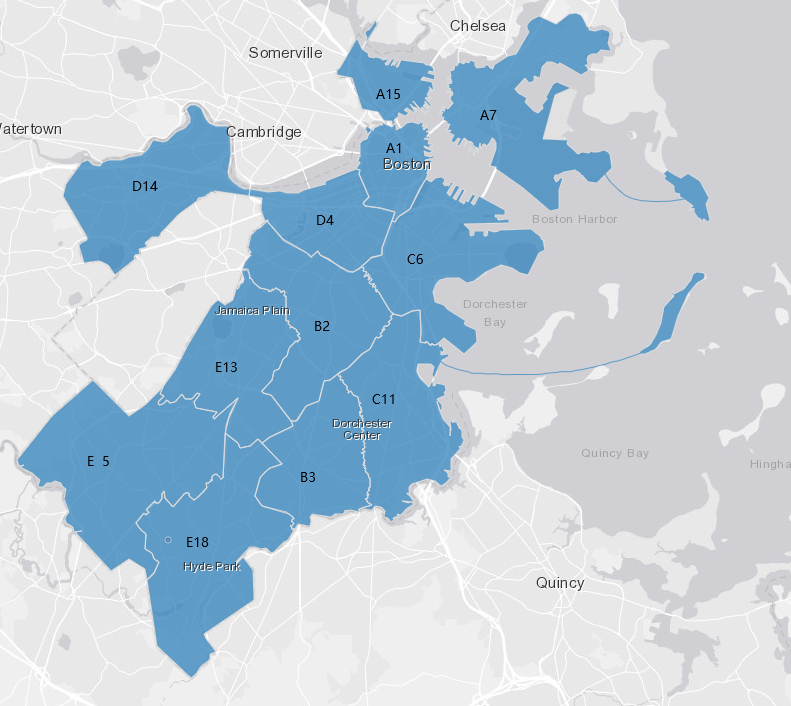

-- Boston haritası

**Other / District** <a id="Other/District"></a> <br>

In [ ]:
col = [Other.A1 , Other.A15 , Other.A7 , Other.B2 , Other.B3 , Other.C11 , Other.C6 , Other.D14 , Other.D4 ,Other.E13,Other.E18,Other.E5]
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(15,10)) 
lap = 0
f= 0
s= 0
while lap < 12:
    pl = ax[f][s]
    pl.bar(Other.shortınd,col[lap],label= dıstrıct[lap])   
    pl.legend(loc='upper left')    
    pl.set_xlabel(' ')
    pl.set_ylabel(" ")
    
    lap += 1 
    s += 1 
    if s == 4:
        s=0
        f+=1
    
plt.show()
print(list(zip(Other.ındex,Other.shortınd)))

Other part which is in other section in ucrpart in the first place this graph. Because of these Others, I cannot do many remarks. However; in the other graphs, I will do more remark with my experience which gains in eighteen years.

**Part One / District** <a id="PortOne/District"></a> <br>

In [ ]:
col = [PartOne.A1 , PartOne.A15 , PartOne.A7 , PartOne.B2 , PartOne.B3 , PartOne.C11 , PartOne.C6 , PartOne.D14 , PartOne.D4 ,PartOne.E13,PartOne.E18,PartOne.E5]
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(15,10)) 
lap = 0
f= 0
s= 0
while lap < 12:
    pl = ax[f][s]
    pl.bar(PartOne.shortınd,col[lap],label=dıstrıct[lap],align="center")   
    pl.legend(loc='upper left')    
    pl.set_xlabel(' ')
    pl.set_ylabel(" ")
    
    lap += 1 
    s += 1 
    if s == 4:
        s=0
        f+=1
    
plt.show()
print(list(zip(PartOne.ındex,PartOne.shortınd)))

South end 's  (D4) which is in the peak of Larceny population density is higher than two times of Boston general's population density (28,4\13,6 ). Where the majority, shit there (That is a direct translation).However, our job is that create a solution. Let's do the first step of our job, find a problem.

--[Kaynak : areavibes](http://www.areavibes.com/boston-ma/cost-of-living/)--

:> High life cost == If we find some connection with fight or escape which is a basic instinct, People seldom choose that leave our hometown and start a new life in another city. On the other hand, Most people choose that violate the Law of Government which does not care about the public. In this stage, Larceny is the best option. If you want more stable earning, you should choose LFMV.

:> Aggravated Assault has not got a huge rate but It can draw attention with its location. In Roxbury (B2), North Dorchester (B3) and Dorchester(C11), Aggravated Assaultrate is as same as Larceny.

:> Downtown(A1) is so far to trinity but it has the same rate as the trinity.

**Part Two / District** <a id="PartTwo/District"></a> <br>

In [ ]:
col = [PartTwo.D14 , PartTwo.A15 , PartTwo.A7 ,  PartTwo.B3 ,PartTwo.B2 , PartTwo.C11 , PartTwo.C6 ,PartTwo.A1 , PartTwo.D4 ,PartTwo.E13,PartTwo.E18,PartTwo.E5]
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(20,20)) 
lap = 0
f= 0
x_index = np.arange(len(PartTwo.shortınd))
width = 0.3

while lap < 4:
    pl = ax[lap]
    pl.bar(x_index-width,col[f],width = 0.25,label=dıstrıct[f],color="#444444")
    f+=1
    pl.bar(x_index,col[f],width = 0.25,label=dıstrıct[f],color="#008fd5")
    f+=1
    pl.bar(x_index+width,col[f],width = 0.25,label=dıstrıct[f],color="#e5ae38")
    f+=1
    pl.set_xticks(ticks=x_index,minor=False)
    pl.set_xticklabels(PartTwo.shortınd,fontdict={'fontsize':13})
    pl.legend(loc='upper left')    
    pl.set_xlabel(' ')
    pl.set_ylabel(" Part Two ")
    
    lap += 1
               
plt.show()
print(list(zip(PartTwo.ındex,PartTwo.shortınd)))

The first 3 places were shared by Drug Violation[DV], Simple Assault[SA], Vandalism[V]. The idiom which is  that Grapes Which is near another dark grape will get dark was confirmed by B2, B3, and C11

Roxbury (B2) and Dorchester(C11)'s crime rate is so same. Because of that, we may think the demographical structure of this district looks similar. However, we do not forget the principle of repetition. Let's look at the other four graphs.

Downtown (A1) and South End (D4) can catch direct proportion on SA and DV but they cannot show the equivalent performance in Vandalism. I do not know anything about this issue (Maybe they have not enough public building). I need some help people who live in Boston.

The neighborhood principle can be confirmed by East Boston (A7) and Charlestown (A15). Both districts have below and likewise rate. 

**Part three / District** <a id="PartThree/District"></a> <br>

In [ ]:
col = [PartThree.D14 , PartThree.A15 , PartThree.A7 ,  PartThree.B3 ,PartThree.B2 , PartThree.C11 , PartThree.C6 ,PartThree.A1 , PartThree.D4 ,PartThree.E13,PartThree.E18,PartThree.E5]
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(20,20)) 
lap = 0
f= 0
x_index = np.arange(len(PartThree.shortınd))
width = 0.3

while lap < 4:
    pl = ax[lap]
    pl.bar(x_index-width,col[f],width = 0.25,label=dıstrıct[f],color="#444444")
    f+=1
    pl.bar(x_index,col[f],width = 0.25,label=dıstrıct[f],color="#008fd5")
    f+=1
    pl.bar(x_index+width,col[f],width = 0.25,label=dıstrıct[f],color="#e5ae38")
    f+=1
    pl.set_xticks(ticks=x_index,minor=False)
    pl.set_xticklabels(PartThree.shortınd,fontdict={'fontsize':12})
    pl.legend(loc='upper left')    
    pl.set_xlabel(' ')
    pl.set_ylabel(" Part Three ")
    
    lap += 1
               
plt.show()
print(list(zip(PartThree.ındex,PartThree.shortınd)))

Investigate Property(IP), Medical Assistance(MA), Motor Vehicle Accident Response(MVAR) share the peak in part three section. These crime types do not correlate with the demographical composition. As a result of that, we start the Anti-neighborhood district.

:> A7-E15 __ Both district location is as same as the north and south pole. However, the offense rate as the same as each other. These small pieces of information can change our view of the neighborhood principle. 

:> E18-D14__ That couple which has a huge distance has a joint feature  which is IP and MA

Maintenance data:

:>B2-B3-C11__ This trinity was a leader every graph. Also, the location of that couple looks like the Bermuda Triangle. 
Because of all these reasons, I especially focus on that group and try to find an extra creative solution.

:> In the VD list, we saw top 3 ad A1, C13. That is a huge problem because Verbal Disputes symbolize the stress level and stress is the mother of all crime types. Somewhere, If you have many mothers, you will have many children.

In [ ]:
def steeter (di,arr1,arr2,df):
    lap = 0 
    mx = 0
    stre= " "
    
    while lap < 12 :
        l = 0
        for i in df.loc[di[lap]].INCIDENT_NUMBER :
            if i > mx :
                mx =  i
                stre = df.loc[di[lap]].INCIDENT_NUMBER.index[l]
            l += 1 
            
        
        data = str(di[lap]) + "\n" + str(stre)
        arr2.append(mx)
        lap += 1 
        arr1.append(data)
        mx = 0
        stre = " "

In [ ]:
street = crime.groupby(["DISTRICT","STREET"]).count()

col1= []
col2= []

dst = ["A1","A15","A7","B2","B3","C11","C6","D14","D4","E13","E18","E5"]  

steeter(dst,col1,col2,street)

fig, ax = plt.subplots(figsize=(26,8)) 
plt.bar(col1,col2,label="hello")   
plt.legend(loc='upper right')    
plt.xlabel('Count')
plt.ylabel("Street ")
plt.show()

In all maps or streets, the main problem is the wedding cake style because of the wedding most time calls gang !!
Everybody knows that gangs cannot clear easily. Actually, You have another gang that is not a problem. The gang has one fundamental postulate which depends on loyalty. People who want to demolish this construction has a bigger lie than a lie which guard by the gang(And everybody knows that only two people can create this lie. 1-)Royal suspect 2-)politician. Both types are worst than others).

** Favorite street ** <a id="Favorite_street"></a> <br>

  **B2 -BLUE HILL AVE** 

In [ ]:
index=[]
loc = []
colr = ['green', 'red', 'purple', 'lightred', 'gray', 'beige', 'lightgreen', 'cadetblue', 'darkred', 'white', 'darkgreen', 'lightgray', 'blue', 'black', 'orange', 'pink', 'darkblue', 'darkpurple', 'lightblue']

steer = crime.loc[((crime.STREET) == "BLUE HILL AVE")& ((crime.DISTRICT)== "B2")&((crime.YEAR)==2016)]

ster = steer.groupby(["OFFENSE_CODE_GROUP"]).count()

data = ster.loc[(ster.OFFENSE_CODE)> 10].index

for i in data :
    x = steer.loc[(steer.OFFENSE_CODE_GROUP)== i]
    lat = x["Lat"].dropna(inplace=False)
    long = x["Long"].dropna(inplace=False)
    Loc = zip(lat,long)
    index.append(i)
    loc.append(list(Loc))
    

street = fl.Map(location=[42.30584602, -71.08470215],zoom_start=14)
fl.raster_layers.TileLayer('Stamen Terrain').add_to(street)
fl.LayerControl().add_to(street)

rad = 50
lap = 0
while lap < 16 :
    
    for i in loc[lap]:
        fl.Circle(location=[i[0],i[1]],radius=rad, color=colr[lap],popup=index[lap] ,fill_color=colr[lap],fill_opacity=0.7).add_to(street)
    
    lap += 1
    rad -= 3

street


In all maps or streets, the main problem is the wedding cake style because of the wedding most time calls gang !!
Everybody knows that gangs cannot clear easily. Actually, You have another gang that is not a problem. The gang has one fundamental postulate which depends on loyalty. People who want to demolish this construction has a bigger lie than a lie which guard by the gang(And everybody knows that only two people can create this lie. 1-)Royal suspect 2-)politician. Both types are worst than others).

Location of the wedding cake :
* Franklin Zoo Park
* Woodcliff Street
* Moreland Street
* Hukins Street
* Brunswick Street

These wedding cakes include the same crime type. My view, that is good but I live in a country which is far 1000km  from Baston, and I don not told my mind because that name is pontificating. The hardest part is that map between Castlegate Road to Stanwood Street. On this dangerous side, Boston has more than a wedding cake such as three wedding cake. I know that this is so mathematical comparison but that is a true and an enormous problem. Although cops usually use the powerful force to prohibit these wedding cakes, these problems were created by the demographical structure. Also we need a god of drawback (politician) to change the demographical composition.

**B3 - BLUE HILL AVE **

In [ ]:
index=[]
loc = []
colr = ['green', 'red', 'purple', 'lightred', 'gray', 'beige', 'lightgreen', 'cadetblue', 'darkred', 'white', 'darkgreen', 'lightgray', 'blue', 'black', 'orange', 'pink', 'darkblue', 'darkpurple', 'lightblue']

steer = crime.loc[((crime.STREET) == "BLUE HILL AVE")& ((crime.DISTRICT)== "B3")&((crime.YEAR)==2016)]
ster = steer.groupby(["OFFENSE_CODE_GROUP"]).count()
data = ster.loc[(ster.OFFENSE_CODE)> 10].index

for i in data :
    x = steer.loc[(steer.OFFENSE_CODE_GROUP)== i]
    lat = x["Lat"].dropna(inplace=False)
    long = x["Long"].dropna(inplace=False)
    Loc = zip(lat,long)
    index.append(i)
    loc.append(list(Loc))
    

street = fl.Map(location=[42.305846 ,-71.077763],zoom_start=14)
fl.raster_layers.TileLayer('Stamen Terrain').add_to(street)
fl.LayerControl().add_to(street)

rad = 50
lap = 0
while lap < 16 :
    
    for i in loc[lap]:
        fl.Circle(location=[i[0],i[1]],radius=rad, color=colr[lap],popup=index[lap] ,fill_color=colr[lap],fill_opacity=0.7).add_to(street)
    
    lap += 1
    rad -= 3


street  

B3 have some problem which is more important than Accident such as Trump Tower. Miss Trump use their political authority and build some Trump cake in Boston D4.


Our main sites :
* Fairway street
* Morton street
* Harambee park
* Vesta road
* Columbia street

This comment may include observer mistake because We do not analyze a short street which is like B2's street. This is longer and already have more offense rate.

In [ ]:
index=[]
loc = []
colr = ['green', 'red', 'purple', 'lightred', 'gray', 'beige', 'lightgreen', 'cadetblue', 'darkred', 'white', 'darkgreen', 'lightgray', 'blue', 'black', 'orange', 'pink', 'darkblue', 'darkpurple', 'lightblue']

steer = crime.loc[((crime.STREET) == "DORCHESTER AVE")& ((crime.DISTRICT)== "C11")&((crime.YEAR)==2016)]
ster = steer.groupby(["OFFENSE_CODE_GROUP"]).count()
data = ster.loc[(ster.OFFENSE_CODE)> 20].index

for i in data :
    x = steer.loc[(steer.OFFENSE_CODE_GROUP)== i]
    lat = x["Lat"].dropna(inplace=False)
    long = x["Long"].dropna(inplace=False)
    Loc = zip(lat,long)
    index.append(i)
    loc.append(list(Loc))
    

street = fl.Map(location=[42.305846 ,-71.077763],zoom_start=13)
fl.raster_layers.TileLayer('Stamen Terrain').add_to(street)
fl.LayerControl().add_to(street)

rad = 50
lap = 0
while lap < 16 :
    
    for i in loc[lap]:
        fl.Circle(location=[i[0],i[1]],radius=rad, color=colr[lap],popup=index[lap] ,fill_color=colr[lap],fill_opacity=0.5).add_to(street)
    
    lap += 1
    rad -= 3

street


When I analyzed the C11 map, I cannot give the location of the wedding cake because I have limited space in the kernel. The main drawback location is all street which is the upper side of Ashmont Peabody square.

I want to do some criticism for the city but that is so complicated crime graph. However, I am far from Boston.

In [ ]:
index=[]
loc = []
colr = ['green', 'red', 'purple', 'lightred', 'gray', 'beige', 'lightgreen', 'cadetblue', 'darkred', 'white', 'darkgreen', 'lightgray', 'blue', 'black', 'orange', 'pink', 'darkblue', 'darkpurple', 'lightblue']

steer = crime.loc[((crime.STREET) == "BOYLSTON ST")& ((crime.DISTRICT)== "D4")&((crime.YEAR)==2016)]

ster = steer.groupby(["OFFENSE_CODE_GROUP"]).count()

data = ster.loc[(ster.OFFENSE_CODE)> 20].index

for i in data :
    x = steer.loc[(steer.OFFENSE_CODE_GROUP)== i]
    lat = x["Lat"].dropna(inplace=False)
    long = x["Long"].dropna(inplace=False)
    Loc = zip(lat,long)
    index.append(i)
    loc.append(list(Loc))
    

street = fl.Map(location=[42.34489594, -71.09659186],zoom_start=14)
fl.raster_layers.TileLayer('Stamen Terrain').add_to(street)
fl.LayerControl().add_to(street)

rad = 50
lap = 0
while lap < 16 :
    
    for i in loc[lap]:
        fl.Circle(location=[i[0],i[1]],radius=rad, color=colr[lap],popup=index[lap] ,fill_color=colr[lap],fill_opacity=0.7).add_to(street)
    
    lap += 1
    rad -= 3

street

Crime structuring which is in D4 is not surprised. Enormes jammed housing, busy road, high density of public building ;
that is a feature of a metropolitan city. D4 needs our help immediately.D4 has 7 cake whish is have not several different each other in Stamen Terrain and that is good because when we fix one cake, we use the same solution way for others. cake. Nonetheless. Nonetheless, the various wedding cake was produced by D4 but It can fix smoothly.

--I  want to create more answers on the D4 map. However, the copious reason is generated by the effect of location such as .... (That list is so long and I am a slothful man).
Also, nobody can estimate all reason because every second most reason will rotate. However, that impossible possibility can be transcendent ML project with time and endurance.-

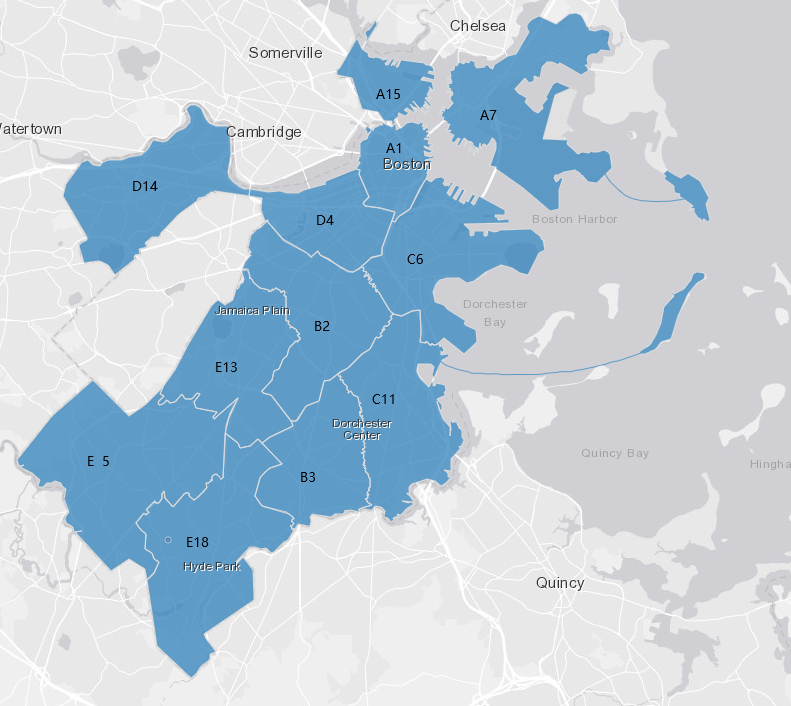

In [ ]:
dıst = crime.loc[((crime.DISTRICT) == "B3")]
lar = dıst.loc[((dıst.OFFENSE_CODE_GROUP) == "Larceny")&((dıst.YEAR)==2016)]

Larloc = []
lat = lar["Lat"].dropna(inplace=False)
long = lar["Long"].dropna(inplace=False)
Larloc.append(zip(lat,long))

Map = fl.Map(location=[42.305846 ,-71.077763], zoom_start=12)

for i in list(Larloc[0]):
    fl.Circle(location=i,radius=30,color="red",fill_color="red",fill_opacity=0.7).add_to(Map)

In [ ]:
dıst = crime.loc[((crime.DISTRICT) == "B2")]
lar = dıst.loc[((dıst.OFFENSE_CODE_GROUP) == "Larceny")&((dıst.YEAR)==2016)]

Larloc = []
lat = lar["Lat"].dropna(inplace=False)
long = lar["Long"].dropna(inplace=False)
Larloc.append(zip(lat,long))


for i in list(Larloc[0]):
    fl.Circle(location=i,radius=30,color="blue",fill_color="blue",fill_opacity=0.7).add_to(Map) 

In [ ]:
dıst = crime.loc[((crime.DISTRICT) == "C11")]
lar = dıst.loc[((dıst.OFFENSE_CODE_GROUP) == "Larceny")&((dıst.YEAR)==2016)]

Larloc = []
lat = lar["Lat"].dropna(inplace=False)
long = lar["Long"].dropna(inplace=False)
Larloc.append(zip(lat,long))


for i in list(Larloc[0]):
    fl.Circle(location=i,radius=30,color="orange",fill_color="orange",fill_opacity=0.7).add_to(Map)
Map

I examine Larceny which is a favorite of the first slice with the map. The crime was not born in an area of overlap in the district. Source place of crime spread al district area unbalanced. That is soo good. I do not know how the border of the district affects Boston but in my hometown borders which is separate the district is a little problem for rozzers because most time criminals can spread both sides of the border.

# Solution tragedy ::

 In the end, I try to look at these graphs with the view of cops or rozzers. However, I am just an engineer and  I find a solution. I try my best but I just want to remind you that My solution cannot as well as a solution which is founded by Boston's abiders.

When we analyze the favorite street part, We saw some site area. I think we can fix it by redemografication. I just a minute ago that word. Its mean is that it positively changes the all demographical configuration. Anddd problem creator cannot do that. This is our responsibility.  Nobody can face that issue better than us.

Also, we have some special suspension as C11 which plays for the peak in location/crime such as AI. However, The job which explains that project for politicians as harder as ...(I cannot find any job equal that).people do not forget cops' mission for that AI. Aı is a perfect machine but all machines need feedback from master people.


# In a nutshell :

In this kernel, we try to exploit the Boston crime data set.
we analyze the most columns and If I can find some shining idea, I will add that kernel. However, the part which is most encourage me is feedback from you because I am still a beginner. 
If you have any idea, please write the comment section. I will thank to your feedback. 